**Background and Motivation**

**Stroke remains a major global health issue, ranking among the leading causes of death and 
long-term disability. Early prediction of stroke risk can significantly reduce complications 
through lifestyle modification, medical intervention, and increased awareness. With the growing 
availability of health data, machine learning provides powerful tools to identify individuals at 
high risk of stroke, enabling data-driven decision-making in public health and clinical practice.**

**Problem Statement**
  
**Develop a machine learning model to accurately predict the likelihood of an individual 
experiencing a stroke based on demographic, lifestyle, and clinical variables, to support early 
detection and targeted intervention strategies.**

**Objectives**

**Explore and preprocess the stroke dataset to ensure data quality.** 

**Load required liibraries**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
import seaborn as sns

**Load the dataset**

In [34]:
df = pd.read_csv("C:/Users/ADMIN/Desktop/Data Science/Datasets/Datasets/Stroke.csv")

**First few observations of the dataset**

In [35]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


**Structure of the dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 460.3+ KB


**Checking for duplicates**

In [5]:
df.duplicated().sum()

0

**Checking for missing values**

In [6]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Removing the id Column**

In [7]:
df = df.drop(columns = ["id"])

**Data type analysis**

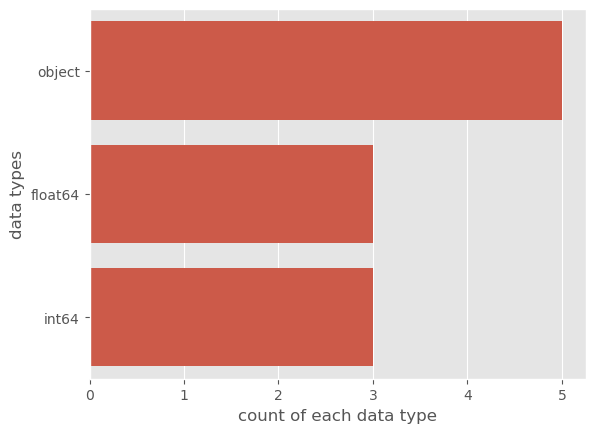

In [8]:
sns.countplot(y=df.dtypes ,data=df)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

**Checking for outliers**

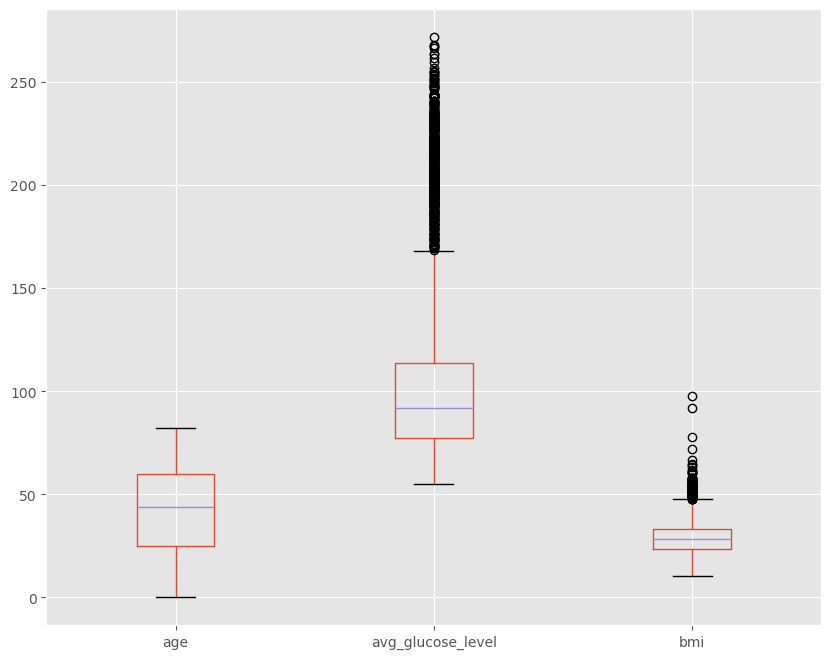

In [9]:
## Checking for outliers
numeric_cols = df.select_dtypes(include = "float64")
numeric_cols.boxplot(figsize = (10, 8))
plt.show()

**Data Preprocessing**

**Handling Outliers**

In [10]:
## Remove outliers
## Calculate the IQR for average glucose level
Q1 = df["avg_glucose_level"].quantile(0.25)
Q3 = df["avg_glucose_level"].quantile(0.75)
IQR = Q3- Q1

## Define the lower and upper bound
lower_bound = Q1- 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

## Remove outliers in average glucose level
df = df[(df["avg_glucose_level"] >= lower_bound) & (df["avg_glucose_level"] <= upper_bound)]

## Calculate IQR for bmi
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)
IQR = Q3- Q1

## Define the lower and upper bounds
lower_bound = Q1- 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

## Remove outliers in bmi
df = df[(df["bmi"] >= lower_bound) & (df["bmi"] <= upper_bound)]

**Label encoding**

In [11]:
## Load the required module
from sklearn.preprocessing import LabelEncoder
## Select categorical columns
categorical_cols = df.select_dtypes(include = ["object"]).columns

## Initialize the label encoder
label_encoder = LabelEncoder()
 
## Apply label encooding to selected columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

**Perform exploratory data analysis (EDA) to understand relationships and patterns.**

**Plotting histograms and kde plots for numeric columns**

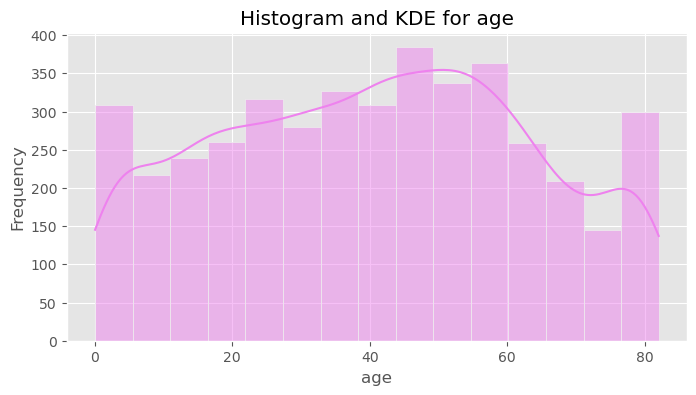

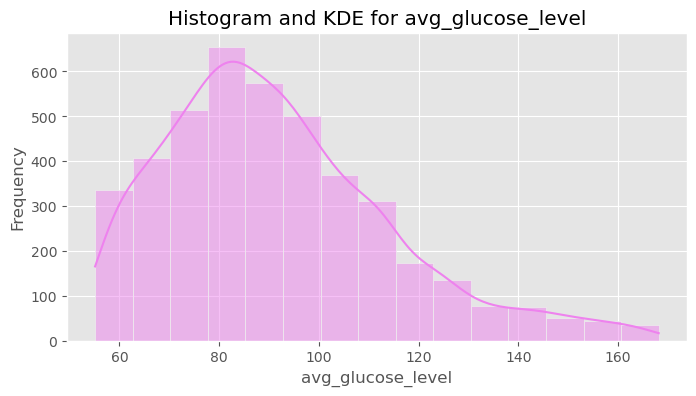

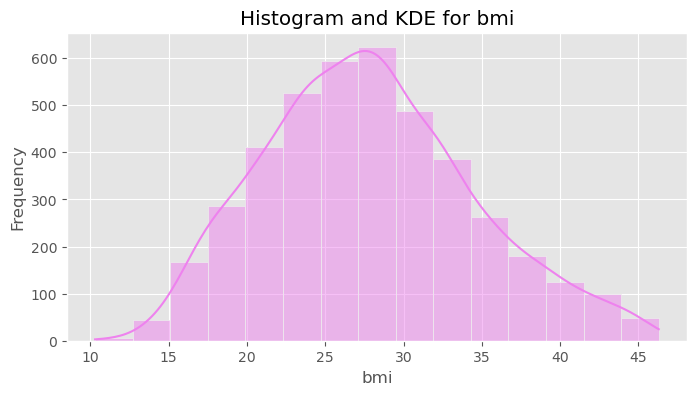

In [12]:
for col in numeric_cols:
    plt.figure(figsize = (8, 4))
    sns.histplot(df[col], kde = True, bins = 15, color = "violet")
    plt.title(f'Histogram and KDE for {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

**Correlation Matrix**

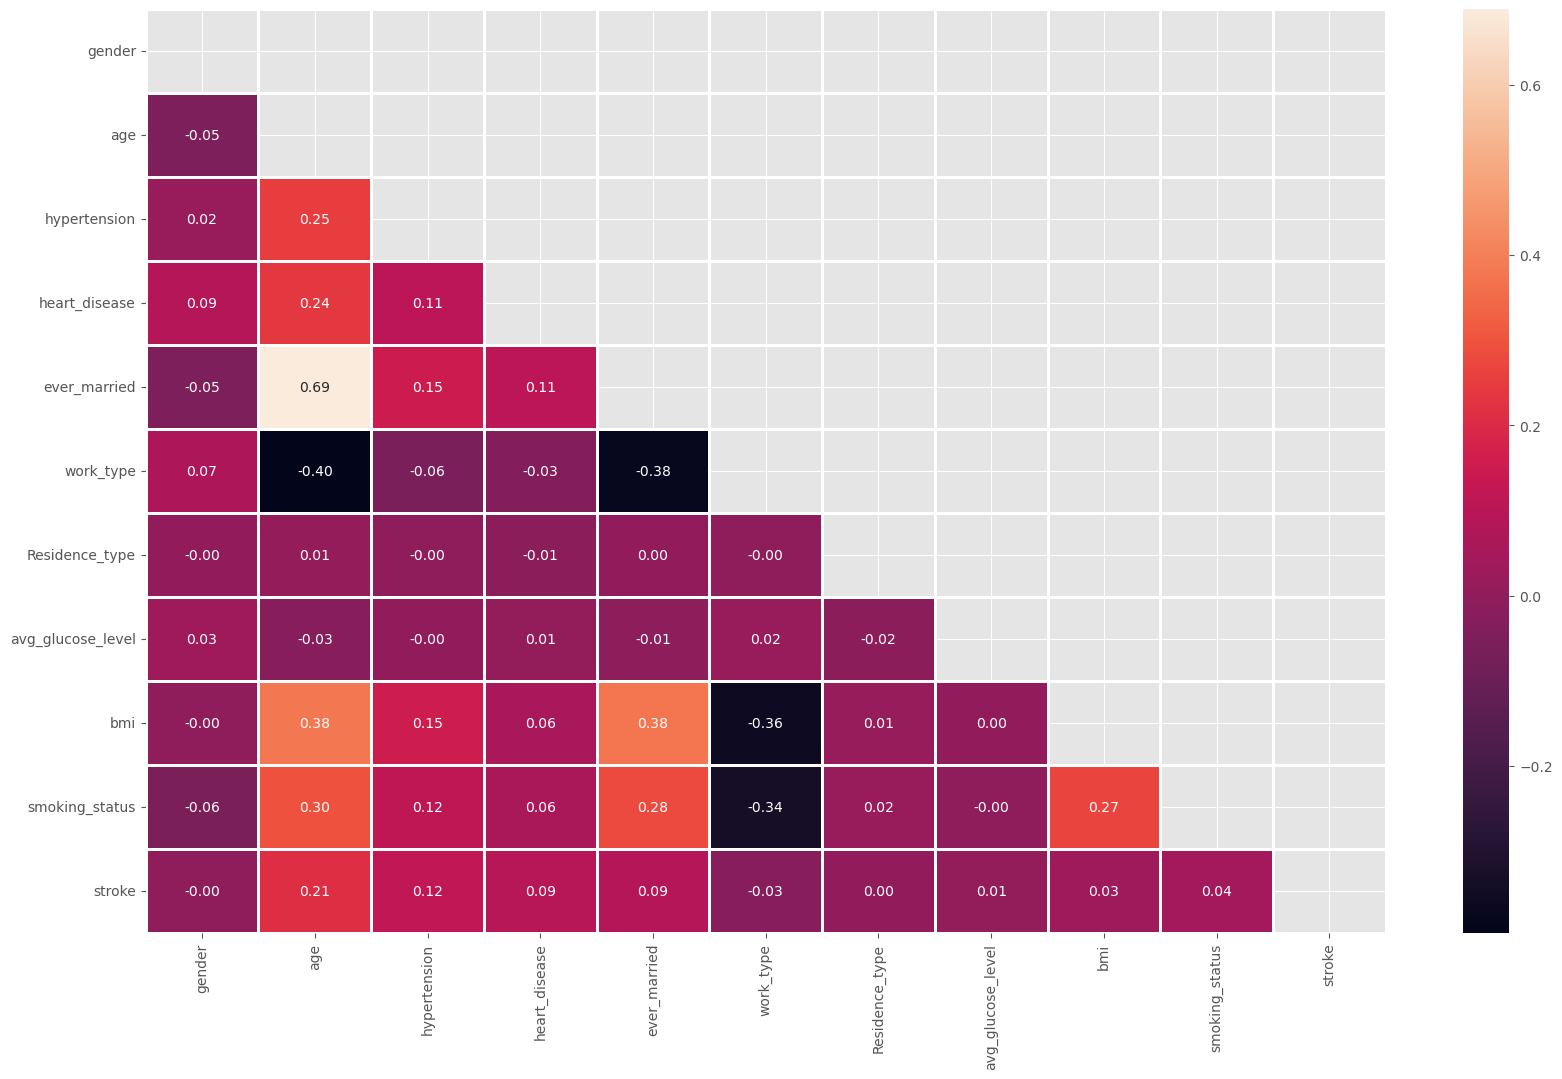

In [13]:
plt.figure(figsize = (20, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

**Distribution of the Study outcome**

In [14]:
df["stroke"].value_counts()

stroke
0    4116
1     136
Name: count, dtype: int64

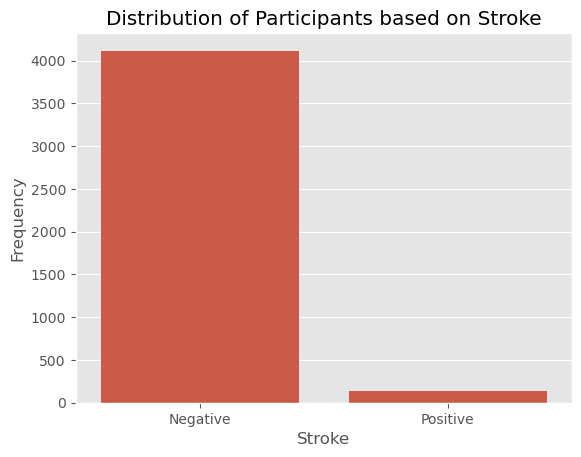

In [15]:
 sns.countplot(x = "stroke", data = df)
 plt.title('Distribution of Participants based on Stroke')
 plt.ylabel("Frequency")
 plt.xlabel("Stroke")
 plt.xticks([0, 1], labels = ["Negative", "Positive"])
 plt.show()

**Defining the X and y features**

In [16]:
X = df.drop(columns = ["stroke"])
y = df["stroke"]

**Handling Class imbalance**

In [17]:
## Load the required module
from imblearn.over_sampling import RandomOverSampler

## Initialize the RandomOverSampler
ros = RandomOverSampler(random_state = 42)

## Apply the RandomOverSampler
X_resampled, y_resampled = ros.fit_resample(X, y)

## Print the oversampled data
dict(zip(*np.unique(y_resampled, return_counts = True)))

{0: 4116, 1: 4116}

**Splitting data into training and test set**

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.30, random_state = 0)

**Standardization**

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Build and compare several machine learning models for stroke prediction.**

**1. Logistic Regression:-**

**Logistical regression is selected when the dependent variable is categorical, meaning they have binary outputs, such as "true" and "false" or "yes" and "no."**

**Logistic regression does not really have any critical hyperparameters to tune. Sometimes, you can see useful differences in performance or convergence with different solvers (solver).Regularization (penalty) can sometimes be helpful.**

In [20]:
## Load the required modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

## Initialize the model
reg = LogisticRegression()

## Fit the model
reg.fit(X_train, y_train)

## Make predictions
lr_pred = reg.predict(X_test)

## Print the evaluation metrics
print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred))
print("\n Precision score is:\n",precision_score(y_test,lr_pred))
print("\n Recall score is:\n",recall_score(y_test,lr_pred))
print("\n Confusion Matrix:\n")

## Print the accuracy score
reg_score = accuracy_score(y_test, lr_pred)


Classification Report is:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76      1235
           1       0.75      0.80      0.77      1235

    accuracy                           0.77      2470
   macro avg       0.77      0.77      0.76      2470
weighted avg       0.77      0.77      0.76      2470


 F1:
 0.7737909516380655

 Precision score is:
 0.746425884123401

 Recall score is:
 0.8032388663967611

 Confusion Matrix:



**2 Random Forest**

**The "forest" references a collection of uncorrelated decision trees, which are then merged together to reduce variance and create more accurate data predictions**

In [21]:
## Load the required modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

## Initialize the model
RF = RandomForestClassifier()

## Define the hyperparameters
n_estimators = [1800]
max_features = ['sqrt', 'log2']

## Define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=RF, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

## Fit the model using grid search
best_model = grid_search.fit(X_train, y_train)

## Make predictions
rf_pred = best_model.predict(X_test)

## Print the accuracy score
RF_score= accuracy_score(y_test, rf_pred)

## Print the evaluation matrix
print("Classification Report is:\n",classification_report(y_test,rf_pred))
print("\n F1:\n",f1_score(y_test,rf_pred))
print("\n Precision score is:\n",precision_score(y_test,rf_pred))
print("\n Recall score is:\n",recall_score(y_test,rf_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1235
           1       1.00      1.00      1.00      1235

    accuracy                           1.00      2470
   macro avg       1.00      1.00      1.00      2470
weighted avg       1.00      1.00      1.00      2470


 F1:
 0.997979797979798

 Precision score is:
 0.9959677419354839

 Recall score is:
 1.0

 Confusion Matrix:



**3 Support Vector Machine**

**It is typically leveraged for classification problems, constructing a hyperplane where the distance between two classes of data points is at its maximum. This hyperplane is known as the decision boundary, separating the classes of data points (e.g., has diabetes vs doesn't have diabetes ) on either side of the plane.**

In [22]:
## Load the required modules
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

## Define model and parameter grid
svm = SVC()
kernel = ['poly', 'rbf']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
grid = dict(kernel=kernel, C=C, gamma=gamma)

## Setup cross-validation and GridSearch
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svm, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro', error_score=0)

## Fit the model
grid_result = grid_search.fit(X_train, y_train)

## Predict class labels on test data
svm_pred = grid_result.predict(X_test)
svm_score = accuracy_score(y_test, svm_pred)

## Evaluate performance
print("Best Parameters:", grid_result.best_params_)
print("Classification Report:\n", classification_report(y_test, svm_pred))
print("F1 Score:", f1_score(y_test, svm_pred, average='macro'))
print("Precision:", precision_score(y_test, svm_pred, average='macro'))
print("Recall:", recall_score(y_test, svm_pred, average='macro'))
print("Accuracy:", svm_score)


Best Parameters: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94      1235
           1       0.89      1.00      0.94      1235

    accuracy                           0.94      2470
   macro avg       0.95      0.94      0.94      2470
weighted avg       0.95      0.94      0.94      2470

F1 Score: 0.9394557947350247
Precision: 0.9461705202312138
Recall: 0.9396761133603239
Accuracy: 0.9396761133603239


**4 XGBOOST Classifier**

In [23]:
## Load the required module
from xgboost import XGBClassifier

## Intialize the model
xgb = XGBClassifier()

## Fit the model
xgb.fit(X_train, y_train)

## Make predictions
xgb_pred = xgb.predict(X_test)

## Print the accuracy score
xgb_score  = xgb.score(X_test, y_test)

## Evaluate performance
print("Classification Report:\n", classification_report(y_test, xgb_pred))
print("F1 Score:", f1_score(y_test, xgb_pred))
print("Precision:", precision_score(y_test, xgb_pred))
print("Recall:", recall_score(y_test, xgb_pred))
print("Accuracy:", accuracy_score(y_test, xgb_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1235
           1       0.96      1.00      0.98      1235

    accuracy                           0.98      2470
   macro avg       0.98      0.98      0.98      2470
weighted avg       0.98      0.98      0.98      2470

F1 Score: 0.9805478364430329
Precision: 0.9618380062305296
Recall: 1.0
Accuracy: 0.9801619433198381


**5 K Nearest Neighbours**

**KNN algorithm, is a non-parametric algorithm that classifies data points based on their proximity and association to other available data.**

In [24]:
## Load the required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV

## List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors =range(15,25)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan']

## convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, weights=weights, metric=metric)

## Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

best_model = grid_search.fit(X_train, y_train)

## Making Predictions
knn_pred = best_model.predict(X_test)

## Print the evaluation metrics
Knn_score = accuracy_score(y_test, knn_pred)
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89      1235
           1       0.83      1.00      0.91      1235

    accuracy                           0.90      2470
   macro avg       0.92      0.90      0.90      2470
weighted avg       0.92      0.90      0.90      2470


 F1:
 0.9080882352941176

 Precision score is:
 0.8316498316498316

 Recall score is:
 1.0


**6 Gradient Boosting Classifier**

In [25]:
## Load the required modules
from sklearn.ensemble import GradientBoostingClassifier

## Initialize the softwares
gbc = GradientBoostingClassifier()

## Define the hyperparameters
parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

## Fit the model with the best hyperparameters
grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

## Make predictions
gbc_pred = grid_search_gbc.predict(X_test)

## Evaluate performance
gbc_score = accuracy_score(y_test, gbc_pred)
print("Classification Report:\n", classification_report(y_test, gbc_pred))
print("F1 Score:", f1_score(y_test, gbc_pred))
print("Precision:", precision_score(y_test, gbc_pred))
print("Recall:", recall_score(y_test, gbc_pred))
print("Accuracy:", accuracy_score(y_test, gbc_pred))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1235
           1       0.96      1.00      0.98      1235

    accuracy                           0.98      2470
   macro avg       0.98      0.98      0.98      2470
weighted avg       0.98      0.98      0.98      2470

F1 Score: 0.9821073558648111
Precision: 0.96484375
Recall: 1.0
Accuracy: 0.9817813765182186


**7 Ada Boost Classifier**

In [26]:
## Load the required modules
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

## Define the model
base_estimator = DecisionTreeClassifier(max_depth = 1)
ada = AdaBoostClassifier(estimator = base_estimator, n_estimators=180, learning_rate = 1.0)

## Fit the model
ada.fit(X_train, y_train)

## Make predictions
ada_pred = ada.predict(X_test)

## Evaluate performance
ada_score = accuracy_score(y_test, ada_pred)
print("Classification Report:\n", classification_report(y_test, ada_pred))
print("F1 Score:", f1_score(y_test, ada_pred))
print("Precision:", precision_score(y_test, ada_pred))
print("Recall:", recall_score(y_test, ada_pred))
print("Accuracy:", accuracy_score(y_test, ada_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84      1235
           1       0.80      0.93      0.86      1235

    accuracy                           0.85      2470
   macro avg       0.86      0.85      0.85      2470
weighted avg       0.86      0.85      0.85      2470

F1 Score: 0.8602472836268266
Precision: 0.800557880055788
Recall: 0.9295546558704454
Accuracy: 0.8489878542510122


**8 Voting Classifier**

In [27]:
## Load the required module
from sklearn.ensemble import VotingClassifier

## Define the base classifiers
classifiers = [('Logistic Regression', reg), ('K Nearest Neighbours', knn), ('Support Vector Classifier', svm)]

## Initialize the model
vc = VotingClassifier(estimators = classifiers)

## Fit the model
vc.fit(X_train, y_train)

## Make predictions
vc_pred = vc.predict(X_test)

## Evaluate performance
vc_score = accuracy_score(y_test, vc_pred)
print("Classification Report:\n", classification_report(y_test, vc_pred))
print("F1 Score:", f1_score(y_test, vc_pred))
print("Precision:", precision_score(y_test, vc_pred))
print("Recall:", recall_score(y_test, vc_pred))
print("Accuracy:", accuracy_score(y_test, vc_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.83      0.88      1235
           1       0.85      0.94      0.89      1235

    accuracy                           0.89      2470
   macro avg       0.89      0.89      0.89      2470
weighted avg       0.89      0.89      0.89      2470

F1 Score: 0.8916953693073096
Precision: 0.8454281567489115
Recall: 0.9433198380566802
Accuracy: 0.8854251012145749


**Model Comparison**

In [31]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Random Forest Classifier', 'Voting Classifier', 'Ada Boost Classifier',
             'Gradient Boosting Classifier', 'xgboost'],
    'Score': [reg_score, Knn_score, svm_score, RF_score, vc_score, ada_score, gbc_score, xgb_score]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest Classifier,0.997976
6,Gradient Boosting Classifier,0.981781
7,xgboost,0.980162
2,SVM,0.939676
1,KNN,0.898785
4,Voting Classifier,0.885425
5,Ada Boost Classifier,0.848988
0,Logistic Regression,0.765182


In [32]:
## Lets save our model using pickle
import pickle as pkl
pkl.dump(best_model, open("stroke.sav","wb"))